<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_RF%20(standalone)%20and%20LSTM%20based%20on%20WSN-DS_rev.2.1(02062023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RF and LSTM (Stanalone) model based on WSN-DS dataset**

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset.shape
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [4]:
dataset["Class"].unique()

array([0, 4, 3, 1, 2])

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


**Data Preprocessing**

In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.0100000e+05 5.0000000e+01 1.0000000e+00 ... 1.3008535e+02
  0.0000000e+00 2.4694000e+00]
 [1.0100100e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  4.0000000e+00 6.9570000e-02]
 [1.0100200e+05 5.0000000e+01 0.0000000e+00 ... 0.0000000e+00
  3.0000000e+00 6.8980000e-02]
 ...
 [2.0109800e+05 1.0030000e+03 0.0000000e+00 ... 1.3926438e+02
  1.0000000e+00 9.4370000e-02]
 [2.0109900e+05 1.0030000e+03 0.0000000e+00 ... 1.5827492e+02
  3.0000000e+00 1.6047000e-01]
 [2.0204100e+05 1.0250000e+03 0.0000000e+00 ... 1.1500407e+02
  0.0000000e+00 1.0132500e+00]]
[0 0 0 ... 0 0 0]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 1: 14596, 2: 10049, 3: 6638, 4: 3312})


In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 340066, 4: 340066, 3: 340066, 1: 340066, 2: 340066})


In [10]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Random Forest (RF) for 5 class classifications**

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[66816   778     8    57    86]
 [    0 66366  1778     0     0]
 [    0  1034 67248     0     0]
 [ 3772    47     6 64184     0]
 [    1     0     0     0 67885]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     67745
           1       0.97      0.97      0.97     68144
           2       0.97      0.98      0.98     68282
           3       1.00      0.94      0.97     68009
           4       1.00      1.00      1.00     67886

    accuracy                           0.98    340066
   macro avg       0.98      0.98      0.98    340066
weighted avg       0.98      0.98      0.98    340066



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='copper')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Random Forest


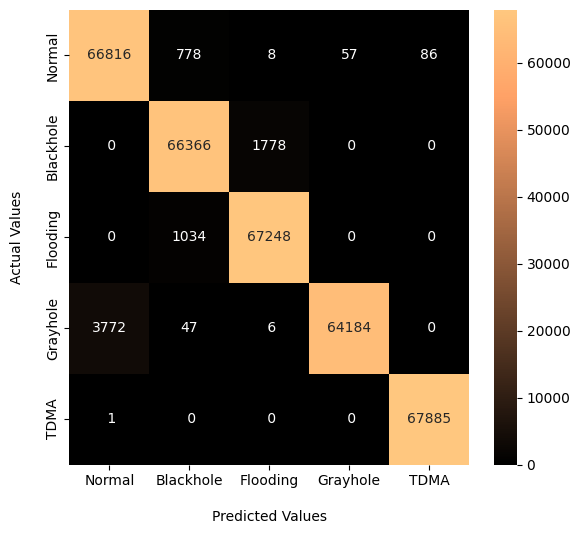

In [14]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1)

In [16]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 97.77484370680986
Precision : 97.82502764204668
Recall : 97.77484370680986
F1-Score : 0.97775413894821


AUC: 1.00


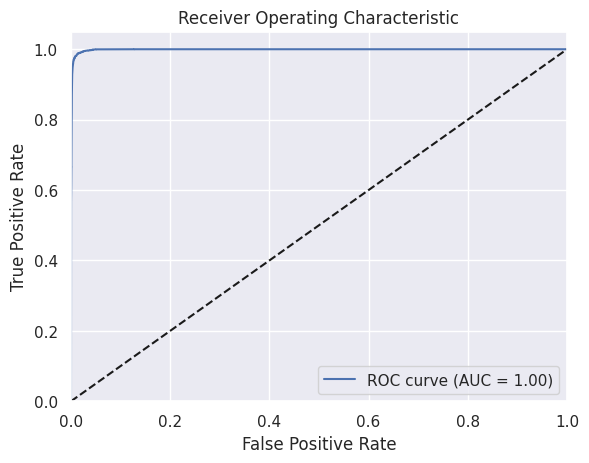

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Compute the predicted probabilities
y_test_probabilities = rf.predict_proba(X_test)

# Compute the AUC
auc = roc_auc_score(y_test, y_test_probabilities, multi_class='ovr')
print("AUC: {:.2f}".format(auc))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probabilities[:, 1], pos_label=1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

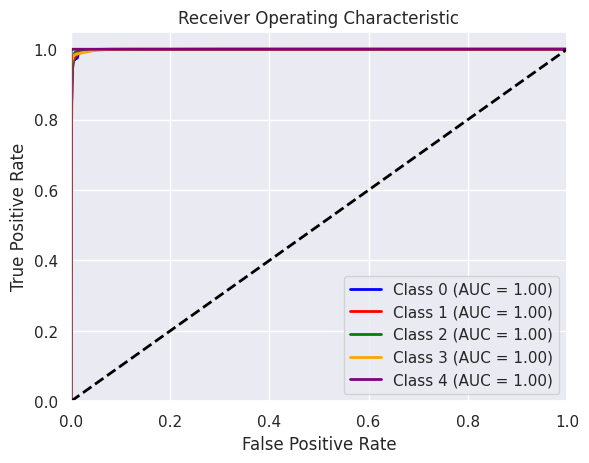

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the AUC and ROC curve
n_classes = 5  # Set the number of classes to 4
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

y_scores = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc_values = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_scores[:, i], pos_label=i)
    roc_auc_values[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange','purple']
class_labels = label_encoder.classes_[:n_classes]  # Get the class labels for plotting

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(class_labels[i], roc_auc_values[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Detection rates of RF model**

In [19]:
# Calculate the detection rates
detection_rates = np.diag(cm) / np.sum(cm, axis=1)

# Print the detection rates
print("Detection Rates:")
for i, rate in enumerate(detection_rates):
    print("Class {}: {:.2f}".format(i, rate))

Detection Rates:
Class 0: 0.99
Class 1: 0.97
Class 2: 0.98
Class 3: 0.94
Class 4: 1.00


**LSTM for 5 class classifications based on WSN-DS dataset**

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

# Evaluate the model
score, acc = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Convert categorical target variables back to class labels
y_true = np.argmax(y_test, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_true, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
42509/42509 [==============================] - 697s 16ms/step - loss: 0.1284 - accuracy: 0.9464 - val_loss: 0.0706 - val_accuracy: 0.9780
Epoch 2/15
42509/42509 [==============================] - 655s 15ms/step - loss: 0.0690 - accuracy: 0.9775 - val_loss: 0.0694 - val_accuracy: 0.9773
Epoch 3/15
42509/42509 [==============================] - 683s 16ms/step - loss: 0.0640 - accuracy: 0.9785 - val_loss: 0.0614 - val_accuracy: 0.9792
Epoch 4/15
42509/42509 [==============================] - 657s 15ms/step - loss: 0.0602 - accuracy: 0.9798 - val_loss: 0.0568 - val_accuracy: 0.9810
Epoch 5/15
42509/42509 [==============================] - 704s 17ms/step - loss: 0.0569 - accuracy: 0.9808 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 6/15
42509/42509 [==============================] - 691s 16ms/step - loss: 0.0547 - accuracy: 0.9814 - val_loss: 0.0517 - val_accuracy: 0.9825
Epoch 7/15
42509/42509 [==============================] - 648s 15ms/step - loss: 0.0529 - accuracy: 0.9820

Confusion Matrix of Long-Short-Term Memory (LSTM)


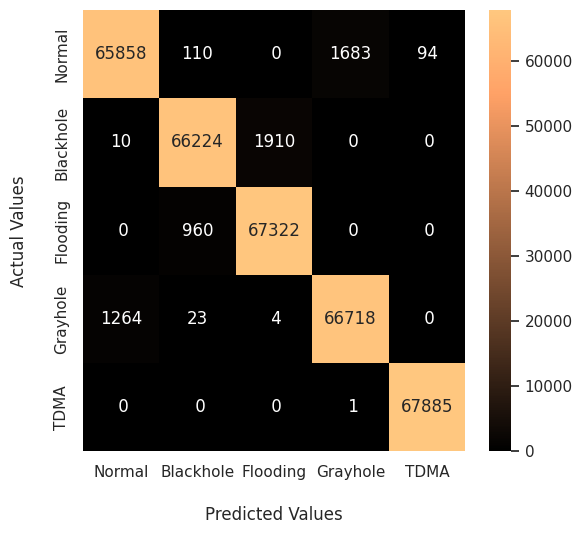

In [22]:
print("Confusion Matrix of Long-Short-Term Memory (LSTM)") 
conf_mat(y_true, predicted_classes)

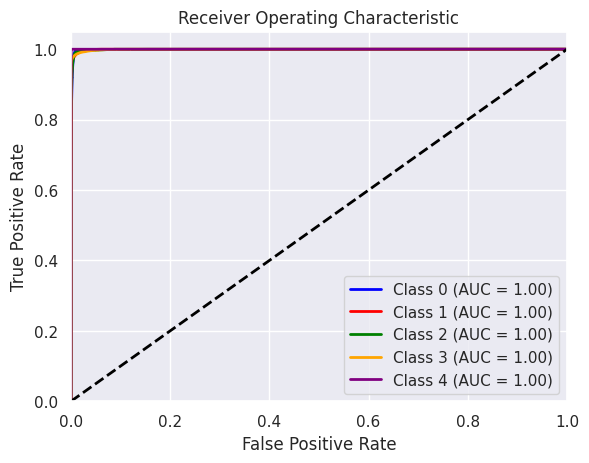

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the AUC and ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5  # Set the number of classes to 5

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange','purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Detection rates of LSTM model**

In [24]:
# Calculate the detection rates
detection_rates = np.diag(cm) / np.sum(cm, axis=1)

# Print the detection rates
print("Detection Rates:")
for i, rate in enumerate(detection_rates):
    print("Class {}: {:.2f}".format(i, rate))

Detection Rates:
Class 0: 0.97
Class 1: 0.97
Class 2: 0.99
Class 3: 0.98
Class 4: 1.00
